# K-Nearest Neighbour Algorithm

- This model has been implemented from the scratch using the libraries **NumPy** and **Matplotlib**.

In [1]:
from google.colab import files
files.upload()

Saving k_nearest_neighbours.py to k_nearest_neighbours (1).py


{'k_nearest_neighbours (1).py': b"''' K-Nearest Algorithm '''\r\n\r\n# Importing numpy for numerical calculations\r\nimport numpy as np\r\n\r\nclass KNearestNeighbours:\r\n\r\n    def euclideanDistance(self,p1,p2):\r\n        ''' It calculates the euclidean distance between two instances and returns the distace '''\r\n        return np.sqrt(np.sum((p1 - p2) ** 2, axis = 1))\r\n\r\n    def fit(self,X_train,y_train):\r\n        ''' 'fit' method takes X_train, y_train (Data to get neighbouring values) as arguments.'''\r\n        self.X_train = X_train\r\n        self.y_train = y_train\r\n\r\n    def mode(self,l):\r\n        ''' 'mode' method takes and l(list of elements) and returns most frequently occurred element.\r\n        If multiple elements occur same number of times then smallest among them is returned.'''\r\n        return list(max(l,key=l.count))\r\n    \r\n    def predict(self,X_test,k):\r\n        ''' It takes X_test(Test data point), k(Numbers of neighbours to be considered) 

In [2]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing, splitting and assigning the training data
train_dataset = pd.read_csv('/content/sample_data/mnist_train_small.csv',header=None)
Xtrain = np.array(train_dataset.iloc[:,1:])
ytrain = np.array(train_dataset.iloc[:,0:1])

#Importing, splitting and assigning the testing data
test_dataset = pd.read_csv('/content/sample_data/mnist_test.csv',header=None)
Xtest = np.array(test_dataset.iloc[:,1:])
ytest = np.array(test_dataset.iloc[:,0:1])

In [4]:
train_samples = Xtrain.shape[0]
test_samples = Xtest.shape[0]
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(20000, 784) (20000, 1)
(10000, 784) (10000, 1)


In [5]:
from k_nearest_neighbours import KNearestNeighbours

In [6]:
model = KNearestNeighbours()
model.fit(Xtrain,ytrain)

# Takes Xtest and 'k' as its arguments and predicts the output
ypred = model.predict(Xtest,5)

In [7]:
acc = model.accuracy(ytest,ypred) # Accuracy on the test data
print("Accuracy of KNN Algorithm on Test Data : ",acc)

Accuracy of KNN Algorithm on Test Data :  95.97


In [9]:
import random
indices = random.sample(range(0,test_samples),2500)

# Accuracy values for different values of k = 5,11,101,501 by choosing 2500 samples randomly
k_values = [5,11,101,501]
test_accuracy = []

for i in k_values:
  y_pred = model.predict(Xtest[indices],i)
  acc = model.accuracy(ytest[indices],y_pred)
  test_accuracy.append(acc)

### Plot of accuracies for various values of k

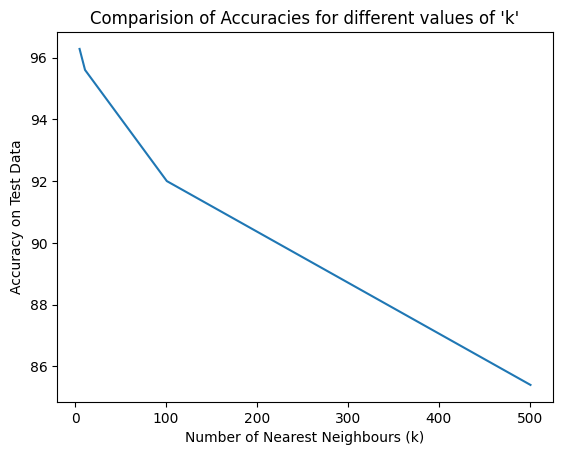

In [12]:
plt.plot(k_values,test_accuracy,ms=4)
plt.xlabel('Number of Nearest Neighbours (k)')
plt.ylabel('Accuracy on Test Data')
plt.title("Comparision of Accuracies for different values of 'k'")
plt.show()

## K-Nearest Algorithm using scikit-learn

In [11]:
from sklearn.neighbors import KNeighborsClassifier
sk_model = KNeighborsClassifier(n_neighbors=5)
sk_model.fit(Xtrain,ytrain.ravel())
sk_acc = sk_model.score(Xtest,ytest)*100
print("Accuracy of SkLearn's KNN Algorithm on Test Data :",sk_acc)

Accuracy of SkLearn's KNN Algorithm on Test Data : 95.91
